In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Loan-Disbursed\\train.csv",encoding="ISO-8859-1")
data.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


### Hypothesis Testing

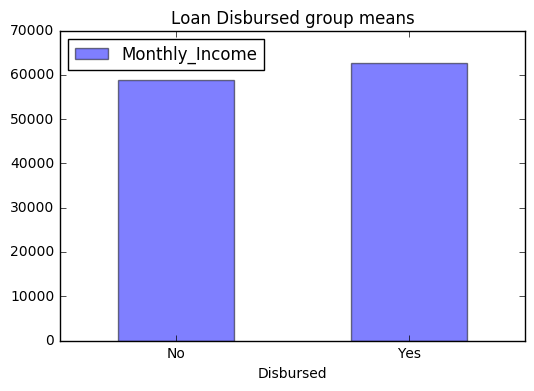

In [3]:
'''
1. Does customer monthly income plays a part in Loan Disbursement?

Null Hypothesis : mean of customer's monthly income who got the loan is same as the mean of those who didn't.
Alternate       : not same means.
'''
income_disburse = data[['Disbursed','Monthly_Income']].groupby('Disbursed').mean()

income_disburse.plot(kind='bar', rot=0, color='blue', alpha=0.5, figsize=[6,4])
plt.xticks(range(2),('No','Yes'))
plt.title("Loan Disbursed group means")

In [4]:
income_disburse_yes = data[data['Disbursed'] == 1]
income_disburse_no = data[data['Disbursed'] == 0]
income_disburse_yes = income_disburse_yes.Monthly_Income
income_disburse_no = income_disburse_no.Monthly_Income

t, p = stats.ttest_ind(income_disburse_yes,income_disburse_no)
print("t-stats : %f" %(t))
print("p-value : %f" %(p))

t-stats : 0.064481
p-value : 0.948588


In [27]:
'''Lets  divide this feature into 3 parts: low, medium and high, & test the hypothesis again.'''
data_n = data.copy()
data_n['monthly_income_bins'] = pd.cut(data_n['Monthly_Income'], bins=[-1,1.650000e+04,4.000000e+04,5.000000e+08], labels=['low','med','high'])

monthIncome_disbursed = pd.crosstab(data_n.Disbursed, data_n.monthly_income_bins)
print(monthIncome_disbursed)

stats.chi2_contingency(monthIncome_disbursed, correction=False)

monthly_income_bins    low    med   high
Disbursed                               
0                    21917  44145  19685
1                        1    463    809


(1256.9304036953863,
 1.1508819248994775e-273,
 2,
 array([[ 21597.36550218,  43955.43755459,  20194.19694323],
        [   320.63449782,    652.56244541,    299.80305677]]))

In [5]:
'''
2. Does existing EMI has lower chances of getting a loan?

Null Hypothesis: m1 = m2
Alternate      : m1 != m2
'''
#for this analysis, I will make a new column 'Exist_EMI_bins' : if existing_EMI == 0, then No, else Yes.
data1 = data.copy()
data1['Exist_EMI_bins'] = data1['Existing_EMI'].apply(lambda x: 'No' if (x==0) else 'Yes')

Existemi_disburse = pd.crosstab(data1.Disbursed, data1.Exist_EMI_bins)
print(Existemi_disburse)


Exist_EMI_bins     No    Yes
Disbursed                   
0               57600  28147
1                 638    635


In [6]:
print("critical value : %f" %(stats.chi2.ppf(0.95, 1)))
stats.chi2_contingency(Existemi_disburse)

critical value : 3.841459


(164.09227014723666,
 1.4441250061271729e-37,
 1,
 array([[ 57386.04672489,  28360.95327511],
        [   851.95327511,    421.04672489]]))

In [7]:
'''
3. Importance of Mobile verification in getting a loan?

Null Hypothesis: proportions of getting and not getting a loan is same across mobile verification.
Alternate      : not same proportions.
'''

mobile_disbursed = pd.crosstab(data.Mobile_Verified, data.Disbursed)
print(mobile_disbursed)

Disbursed            0     1
Mobile_Verified             
N                30312   227
Y                55435  1046


In [8]:
print("critical value : %f" %(stats.chi2.ppf(0.95, 1)))
stats.chi2_contingency(mobile_disbursed)

critical value : 3.841459


(168.24035789451602,
 1.7926740112982512e-38,
 1,
 array([[ 30092.25043668,    446.74956332],
        [ 55654.74956332,    826.25043668]]))

In [9]:
'''
4. Importance of Device type in getting a loan?

Null Hypothesis: proportion of getting and not getting a loan is same across different device types.
Alternate      : not same proportions.
'''

device_disbursed = pd.crosstab(data.Disbursed, data.Device_Type)

device_disbursed

Device_Type,Mobile,Web-browser
Disbursed,,
0,22440,63307
1,264,1009


In [10]:
print("critical value : %f" %(stats.chi2.ppf(0.95, 1)))
stats.chi2_contingency(device_disbursed)

critical value : 3.841459


(18.910482116559496,
 1.3699784135029375e-05,
 1,
 array([[ 22371.86724891,  63375.13275109],
        [   332.13275109,    940.86724891]]))

                     Loan_Amount_Applied
monthly_income_bins                     
low                        120221.651246
med                        207704.010862
high                       397144.676502


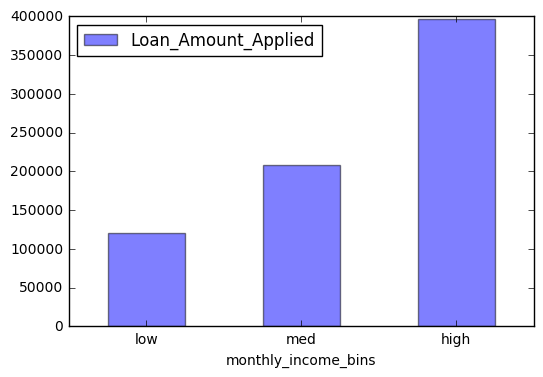

In [11]:
'''
5. Is the mean loan amount applied by a low income customer different than a medium or high income customer?
Null Hypothesis: equal means
Alternate      : ot equal means
'''
#to conduct this test, i will divide the monthly incomes to 3 parts.
#first removve missing values from these 2 features
data1 = data[['Monthly_Income','Loan_Amount_Applied']]
data1 = data1.dropna()

data1['monthly_income_bins'] = pd.cut(data1['Monthly_Income'], bins=[-1,1.650000e+04,4.000000e+04,5.000000e+08], labels=['low','med','high'])

loan_applied_mean = data1[['Loan_Amount_Applied','monthly_income_bins']].groupby('monthly_income_bins').mean()
print(loan_applied_mean)

loan_applied_mean.plot(kind='bar', color='blue', rot=0, alpha=0.5)

F_onewayResult(statistic=array([ 3711.93408371]), pvalue=array([ 0.]))
     Multiple Comparison of Means - Tukey HSD,FWER=0.05    
group1 group2   meandiff      lower        upper     reject
-----------------------------------------------------------
 high   low   -276923.0253 -284668.3986 -269177.6519  True 
 high   med   -189440.6656 -196168.9464 -182712.3848  True 
 low    med    87482.3596   80908.1342   94056.585    True 
-----------------------------------------------------------


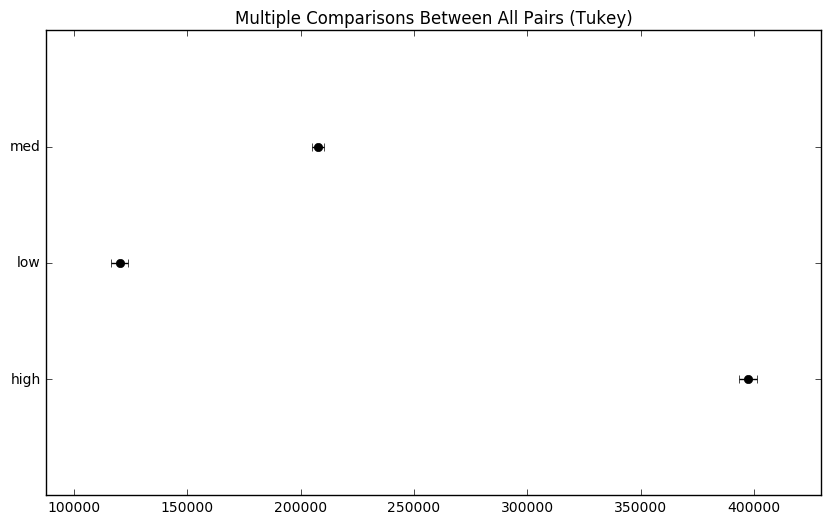

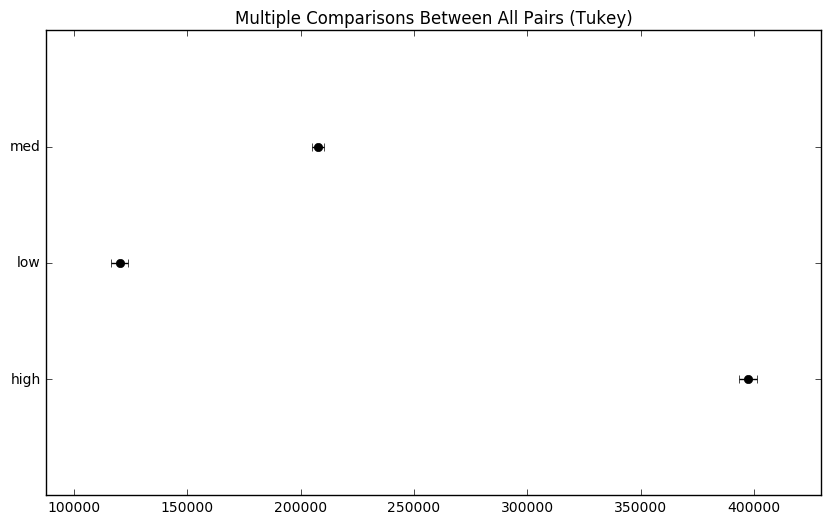

In [12]:
low = data1[data1['monthly_income_bins'] == 'low']
medium = data1[data1['monthly_income_bins'] == 'med']
high = data1[data1['monthly_income_bins'] == 'high']

low = low[['Loan_Amount_Applied']]
medium = medium[['Loan_Amount_Applied']]
high = high[['Loan_Amount_Applied']]

anova = stats.f_oneway(low,medium,high)
print(anova)

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(data1['Loan_Amount_Applied'], data1['monthly_income_bins'], alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

In [13]:
#Earlier we conducted a t-test for monthly income and loan disbursement and found out that getting a loan or not getting a loan
#is not significant based on monthly income.
#now lets divide the monthly incomes into 3 parts and conduct a chi2 test to find any significance.
'''
6. Does different levels of monthly incomes plays a part in loan disbursement?
Null Hypothesis: different levels of monthly income has sameproportion of loan disbursement.
Alternate      : not same
'''
data2 = data[['Monthly_Income','Disbursed']]
data2['monthly_income_bins'] = pd.cut(data2['Monthly_Income'], bins=[-1,1.650000e+04,4.000000e+04,5.000000e+08], labels=['low','med','high'])

income_bins_loan = pd.crosstab(data2.Disbursed, data2.monthly_income_bins)
print(income_bins_loan)

monthly_income_bins    low    med   high
Disbursed                               
0                    21917  44145  19685
1                        1    463    809


C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
stats.chi2_contingency(income_bins_loan, correction=False)

(1256.9304036953863,
 1.1508819248994775e-273,
 2,
 array([[ 21597.36550218,  43955.43755459,  20194.19694323],
        [   320.63449782,    652.56244541,    299.80305677]]))

       Loan_Amount_Applied  Loan_Amount_Submitted
count         3.387200e+04           3.387200e+04
mean          3.722004e+05           3.302870e+05
std           3.923312e+05           2.865820e+05
min           7.000000e+00           5.000000e+04
25%           2.000000e+05           1.300000e+05
50%           3.000000e+05           2.200000e+05
75%           5.000000e+05           5.000000e+05
max           9.999999e+06           3.000000e+06


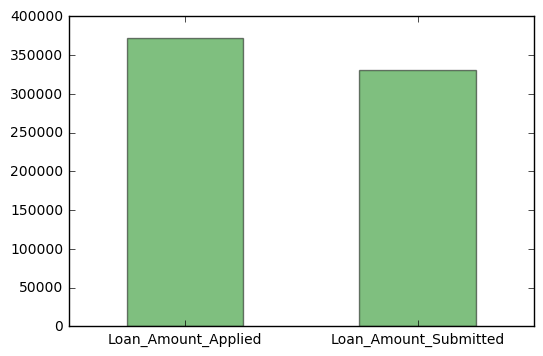

In [15]:
'''
7. Are the means of loan amnt applied and the loan amnt submitted significantly different?
Null Hypothesis: both means are same
Alternate      : not same
'''
loan_sub = data[(data['Loan_Amount_Submitted'] > 0) & (data['Loan_Amount_Applied'] > 0)]
loan_applied_sub = loan_sub[['Loan_Amount_Applied','Loan_Amount_Submitted']]
print(loan_applied_sub.describe())

loan_applied_sub.mean().plot(kind='bar', color='green', alpha=0.5, rot=0)

In [16]:
t, p = stats.ttest_ind(loan_applied_sub.Loan_Amount_Applied,loan_applied_sub.Loan_Amount_Submitted)
print("t-stats : %f" %(t))
print("p-value : %f" %(p))

t-stats : 15.877002
p-value : 0.000000


       Loan_Tenure_Applied  Loan_Tenure_Submitted
count         31493.000000           31493.000000
mean              3.539866               3.562061
std               1.323742               1.320821
min               1.000000               1.000000
25%               3.000000               3.000000
50%               4.000000               4.000000
75%               5.000000               5.000000
max               5.000000               6.000000


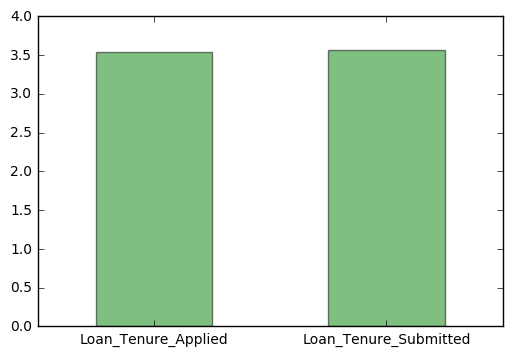

In [17]:
'''
8. Are the means of loan tenure applied and the loan tenure submitted significantly different?
Null Hypothesis: both means are same
Alternate      : not same
'''
loan_tenuresub = data[(data['Loan_Tenure_Submitted'] > 0) & (data['Loan_Tenure_Applied'] > 0)]
loan_tenureapplied_sub = loan_tenuresub[['Loan_Tenure_Applied','Loan_Tenure_Submitted']]
print(loan_tenureapplied_sub.describe())

loan_tenureapplied_sub.mean().plot(kind='bar', color='green', alpha=0.5, rot=0)

In [18]:
t, p = stats.ttest_ind(loan_tenureapplied_sub.Loan_Tenure_Applied,loan_tenureapplied_sub.Loan_Tenure_Submitted)
print("t-stats : %f" %(t))
print("p-value : %f" %(p))

t-stats : -2.106352
p-value : 0.035178


In [19]:
data.Loan_Amount_Submitted.describe()

count    5.240700e+04
mean     3.950106e+05
std      3.082481e+05
min      5.000000e+04
25%      2.000000e+05
50%      3.000000e+05
75%      5.000000e+05
max      3.000000e+06
Name: Loan_Amount_Submitted, dtype: float64

                   Interest_Rate
loanamnt_sub_bins               
low                    20.533542
med                    19.408907
high                   15.597227


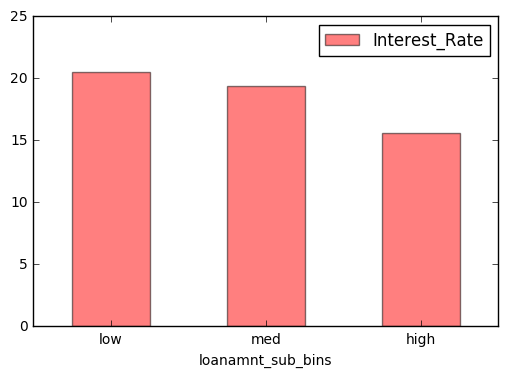

In [20]:
'''
9. Do we have a significant relationship between Loan Amount Submitted and Interest Rates?
Null Hypothesis: all 3 group means are same
Alternate      : not same
'''
data2 = data[['Loan_Amount_Submitted','Interest_Rate']]
data2 = data2.dropna()

# for this analysis, I will divide the loan amnt submitted into 3 different levels.
data2['loanamnt_sub_bins'] = pd.cut(data2.Loan_Amount_Submitted, bins=[0,2.000000e+05,5.000000e+05,4.000000e+06], labels=['low','med','high'])

loan_interest = data2[['loanamnt_sub_bins','Interest_Rate']].groupby('loanamnt_sub_bins').mean()
print(loan_interest)

loan_interest.plot(kind='bar',color='red',alpha=0.5, rot=0)

F_onewayResult(statistic=array([ 1239.48554064]), pvalue=array([ 0.]))
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower   upper  reject
--------------------------------------------
 high   low    4.9363  4.7023  5.1704  True 
 high   med    3.8117  3.5858  4.0376  True 
 low    med   -1.1246  -1.298 -0.9512  True 
--------------------------------------------


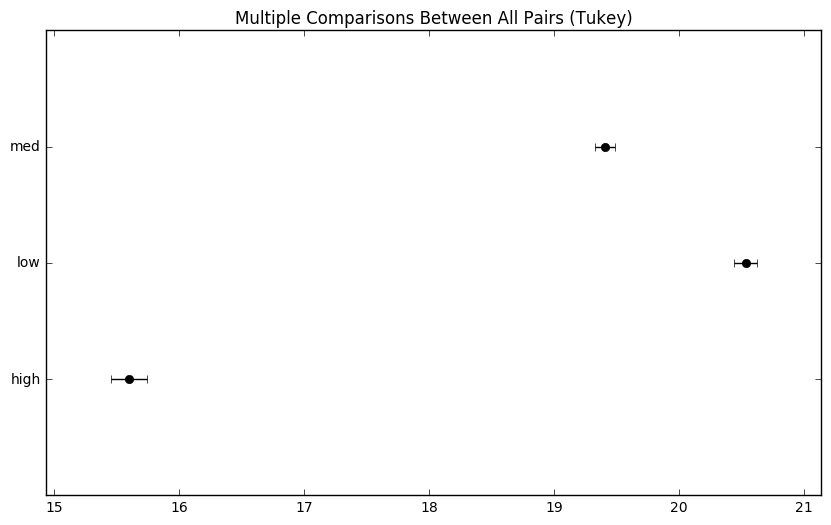

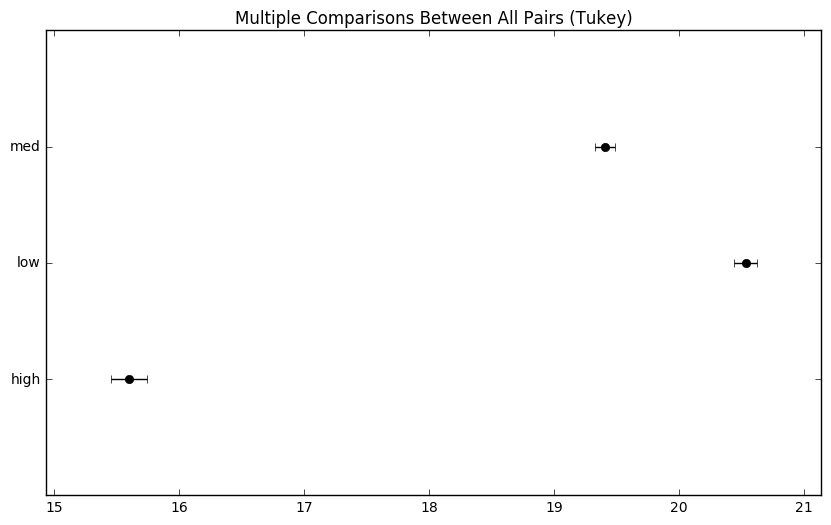

In [21]:
low1 = data2[data2['loanamnt_sub_bins'] == 'low']
medium1 = data2[data2['loanamnt_sub_bins'] == 'med']
high1 = data2[data2['loanamnt_sub_bins'] == 'high']

low1 = low1[['Interest_Rate']]
medium1 = medium1[['Interest_Rate']]
high1 = high1[['Interest_Rate']]

anova1 = stats.f_oneway(low1,medium1,high1)
print(anova1)

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey1 = pairwise_tukeyhsd(data2['Interest_Rate'], data2['loanamnt_sub_bins'], alpha=0.05)
print(tukey1.summary())
tukey1.plot_simultaneous()

In [22]:
'''
This is little bit tricky. I want to create a new column 'Loan_Acquired' i.e the total amount of money the customer needs to pay 
off at the end of the tenure.

Loan_acquired = principal_amount(1 + (interest_rate * tenure))

10. Does loan getting disbursed on an average has higher amount for loan_acquired than not getting a loan?
Null Hypothesis: both have the same means
Alternate      : not same. 
'''

data['loan_acquired'] = data.apply(lambda x: x['Loan_Amount_Submitted'] * (1 + (x['Loan_Tenure_Submitted'] * x['Interest_Rate'])), axis=1)

           loan_acquired
Disbursed               
0          276085.410024
1          300702.646362


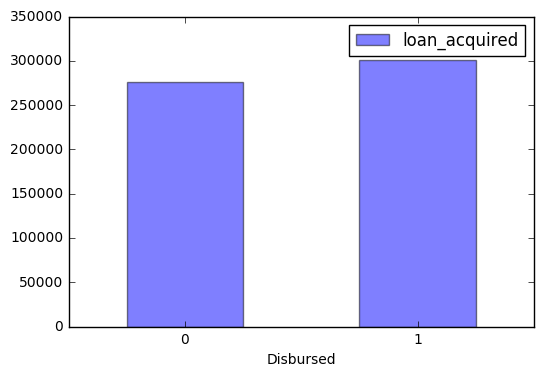

In [23]:
data3 = data.copy()
data3 = data3[['Disbursed','loan_acquired']]
data3.dropna(inplace=True)

data3['loan_acquired'] = data3['loan_acquired'].apply(lambda x : x/100)

acquired_means = data3[['Disbursed','loan_acquired']].groupby('Disbursed').mean()
print(acquired_means)
acquired_means.plot(kind='bar',color='blue', alpha=0.5, rot=0)

In [25]:
'''We got difference in average loan acquired, it seems higher loan amount gets disbursed more. 
Lets conduct a test to prove this initial assumption.'''
disbursed_yes = data3[data3['Disbursed'] == 1] 
disbursed_no = data3[data3['Disbursed'] == 0]

disbursed_yes = disbursed_yes.loan_acquired
disbursed_no = disbursed_no.loan_acquired

anova3 = stats.f_oneway(disbursed_yes,disbursed_no)
print(anova3)

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey3 = pairwise_tukeyhsd(data3['loan_acquired'], data3['Disbursed'], alpha=0.05)
print(tukey3.summary())

F_onewayResult(statistic=7.3456706142710999, pvalue=0.0067265799749811183)
 Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff    lower     upper   reject
---------------------------------------------------
  0      1    24617.2363 6814.3417 42420.131  True 
---------------------------------------------------
